# Tarea 2

## Instrucciones:
1. Modifique el nombre del documento para agregar tu nombre y apellido
2. Una vez elaborados los ejercicios enviar vía correo electrónico `mario.villasante@ciencias.unam.mx`
3. La fecha **límite** de entrega será el día **viernes 31 de mayo**.

Tómese la libertad de agregar celdas de código y texto como usted crea conveniente. Explique y comente el código. Para mayor información sobre la entrega de tareas favor de consultar [este](https://github.com/mvillasante/Programacion_I/blob/master/Formato_Tareas.md) link.

# Métodos Monte Carlo

## 1. Integrales con puntos

Considera la función complicada (patológica) $$f(x) = \sin^2 (\textstyle \frac{1}{x}).$$

1. Dibuja la función para $x$ entre $-2$ y $2$.


In [1]:
using Plots
gr()

Plots.GRBackend()

Debemos tener cuidado al evaluar nuestra función. Veamos el arreglo siguiente

In [2]:
δx =0.1
xes = [i for i in -2:δx:2]

41-element Array{Float64,1}:
 -2.0
 -1.9
 -1.8
 -1.7
 -1.6
 -1.5
 -1.4
 -1.3
 -1.2
 -1.1
 -1.0
 -0.9
 -0.8
  ⋮  
  0.9
  1.0
  1.1
  1.2
  1.3
  1.4
  1.5
  1.6
  1.7
  1.8
  1.9
  2.0

Si intentamos evaluar el siguiente elemento en nuestra función tendremos problemas

In [5]:
xes[21]

0.0

In [6]:
1/0.0

Inf

Regresando a nuestro problema original.

In [11]:
δx =1e-3
xes = [i for i in -2:pi*δx:2]

1274-element Array{Float64,1}:
 -2.0               
 -1.9968584073464102
 -1.9937168146928204
 -1.9905752220392305
 -1.9874336293856407
 -1.9842920367320511
 -1.9811504440784613
 -1.9780088514248715
 -1.9748672587712817
 -1.9717256661176918
 -1.968584073464102 
 -1.9654424808105122
 -1.9623008881569224
  ⋮                 
  1.9646899288303192
  1.9678315214839088
  1.9709731141374989
  1.9741147067910885
  1.9772562994446785
  1.980397892098268 
  1.9835394847518577
  1.9866810774054477
  1.9898226700590373
  1.9929642627126274
  1.996105855366217 
  1.999247448019807 

In [3]:
f(x) = (sin(1/x))^2

yes = [f(i) for i in xes]

1274-element Array{Float64,1}:
 0.22984884706593015
 0.23051111065042523
 0.23117613153994562
 0.2318439243033492 
 0.23251450359894743
 0.23318788417508624
 0.23386408087072988
 0.2345431086160476 
 0.2352249824330038 
 0.23590971743595227
 0.2365973288322319 
 0.23728783192276756
 0.2379812421026727 
 ⋮                  
 0.23745366931717127
 0.23676247125445038
 0.23607416856520216
 0.2353887459259946 
 0.23470618810712546
 0.23402647997202147
 0.23334960647664085
 0.23267555266887902
 0.23200430368797803
 0.2313358447639379 
 0.2306701612169329 
 0.23000723845672974

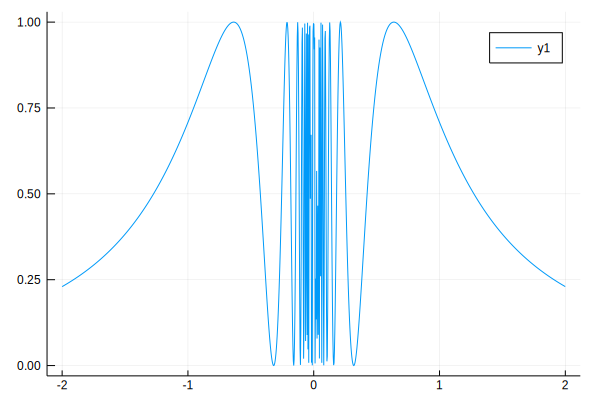

In [12]:
plot(xes,yes)

In [13]:
mitad = Int64(floor((length(xes)+1)/2))

637

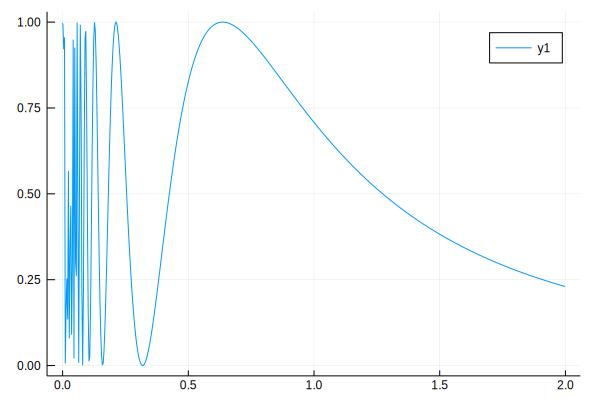

In [14]:
plot(xes[mitad:end],yes[mitad:end])

Sea 
$$ I(x) := \int_0^x f(x') dx'.$$ 

Sabemos que $0 < I(x) < x$ para toda $x$ (¿por qué?), pero no está fácil calcular su valor, ni siquiera con los métodos numéricos estándares, debido a la naturaleza complicada de la función cerca de $x = 0$.

2. Utiliza un método parecido al que usamos antes para calcular $\pi$ usando puntos aleatorios $I(x)$ para un valor de $x$ dado.




Primero vamos a repasar lo que debe hacer nuetra función $I(x)$

In [15]:
### Generamos puntos aleatorios

### Comparamos la coordeana vertical del punto (xes,yes_aleatorio) con 
### el valor f(xes) > yes_aleatorio
δx =1e-6
xes = [i for i in δx:pi*δx:2]
yes_aleatorio = [rand() for i in 1:length(xes)]

636620-element Array{Float64,1}:
 0.25085341582948084
 0.9762038680505309 
 0.13729939815723813
 0.47804576085677186
 0.4470536650706003 
 0.827199291314896  
 0.9994328004535193 
 0.19245075379059706
 0.5823009931022347 
 0.6707859201077702 
 0.8906298295803117 
 0.9456793384587752 
 0.9397201732522296 
 ⋮                  
 0.9624317364493913 
 0.060082680881133  
 0.18446492874261744
 0.1203948337000027 
 0.3782516832838996 
 0.9992644945341542 
 0.3978216874587315 
 0.6750336299357658 
 0.6420285017289082 
 0.6738453607910915 
 0.931936243101892  
 0.606908270717887  

In [6]:
contador = 0
for i in 1:length(xes)
    if f(xes[i]) > yes_aleatorio[i]
        contador += 1
    end
end

In [7]:
contador

344714

In [8]:
total_puntos = length(xes)
contador /total_puntos

0.5414752913826144

### ¿Qué significa este número?

Nótese que $max(f(x)) = 1$ para $x\in \mathbb{R}$. Por lo tanto nuestra integral se puede acotar por arriba y por abajo:

$$ I(x) = \int_0^x f(x')dx' \le (x-0)*max(f(x)) $$

Al arrojar puntos aleatorios podemos calcular la integral si nos damos cuenta que:

$$\frac{puntos_{abajo}}{puntos_{totales}} = \frac{A_{sin}}{A_{rec}}$$

donde

$$A_{rect} = 1*x.$$ 

Por lo tanto

$$A_{sin}= \frac{puntos_{abajo}}{puntos_{totales}} x $$


In [ ]:
### En este caso nuestra x es xes[end]=2
area = 2*contador/ total_puntos 

Ahora sí construimos la función al poner todos los pasos juntos.

In [36]:

function I(x_final,num_puntos,x_inicial=0)
    δx=(x_final-x_inicial)/num_puntos
    xes = [i for i in x_inicial+δx:δx:x_final]
    
    yes = [f(i) for i in xes ]
    
    yes_aleatorio = rand(num_puntos)
    
    puntos_abajo = 0
    for i in 1:num_puntos
        
        if yes[i] > yes_aleatorio[i]       ###yes<f(xes)
            puntos_abajo += 1
        end
    end
        
    return (x_final-x_inicial)*puntos_abajo/num_puntos
end


I (generic function with 2 methods)

In [1]:
x_inicial=0
x_final = 2
num_puntos = Int32(1e7)

@time I(x_final,num_puntos)


UndefVarError: UndefVarError: I not defined

Podemos construir una función mucho más eficiente en el uso de la memoria haciendo uso de `range()`.
El tamaño de un objeto tipo *rango* usa mucha menos memoria que un arreglo de *N* elementos de números `Float64`

In [53]:
sizeof(range(0,stop=2,length=Int32(1e6)))

48

In [6]:
function I2(x_final,num_puntos,x_inicial=0)
    δx=(x_final-x_inicial)/num_puntos
    #xes = [i for i in x_inicial+δx:δx:x_final]
    
    xes = range(x_inicial+δx,stop=x_final, length=num_puntos)
    #yes = [f(i) for i in xes ]
    
    #yes_aleatorio = rand(num_puntos)
    f(x) = (sin(1/x))^2
    puntos_abajo = 0
    for i in 1:num_puntos
        yes_aleatorio=rand()
        yes = f(xes[i])
        if yes_aleatorio < yes####yes[i] > yes_aleatorio[i]       ###yes<f(xes)
            puntos_abajo += 1
        end
    end
        
    return (x_final-x_inicial)*puntos_abajo/num_puntos
end

I2 (generic function with 2 methods)

In [ ]:
@time I2(x_final,num_puntos)

In [ ]:
num_puntos = Int64(1e8)
@time I2(x_final,num_puntos)
@time I2(x_final,num_puntos)

3. Dibuja la función $I(x)$.

In [9]:
using Plots
gr()

Plots.GRBackend()

In [17]:
x_final_grafica = 1000
x_inicial = 0
num_puntos = Int64(1e6)
xes = range(x_inicial+1e-4,stop=x_final_grafica,length=100)
I_plot = [I2(i ,num_puntos) for i in xes]


100-element Array{Float64,1}:
 4.99436e-5        
 1.475893251490909 
 1.517239681809091 
 1.5358837026909091
 1.5537410638636362
 1.5597504070727273
 1.557093322581818 
 1.560436394290909 
 1.5572542966272729
 1.5687288414545455
 1.5650518979454546
 1.5731123695999998
 1.5792738722454545
 ⋮                 
 1.6097777979      
 1.572333351       
 1.6018181978363637
 1.567222236       
 1.5993131434818182
 1.5979091012181819
 1.5609697052727274
 1.5603030368727273
 1.571878792790909 
 1.567676770909091 
 1.6244242440818182
 1.562             

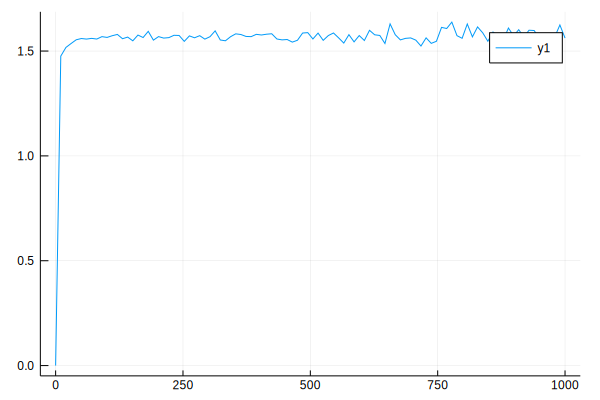

In [18]:
plot(xes,I_plot)

## 2. Paradoja del cumpleaños

Si tenemos un grupo de `N` personas. ¿Cuál es la probabilidad de que dos personas cumplan años el mismo día?  
Para responder a esta pregunta en general, dividamos este problema en partes

1. Sin usar la computadora. ¿Para que valor de `N` la probabilidad es 100%?

In [19]:
N = 366

366

2. Escriba un código donde se demuestre que para $N=30$ la probabilidad es 70%

In [27]:


function repeticiones(Num_grupos,alumnos)
    contador = 0
    dias = [i for i in 1:365]
    for j in 1:Num_grupos
        grupo = rand(dias,alumnos)
        
        for i in 1:length(grupo)
            if (grupo[i] ∈ grupo[i+1:end]) 
                #println("El valor ",grupo[i], " se repite")
                #println(grupo)
                
                contador = 1 + contador
                break
            
            end
    
        end
    end
    return contador
end


repeticiones (generic function with 1 method)

In [24]:
dias = [i for i in 1:365]


365-element Array{Int64,1}:
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
   ⋮
 354
 355
 356
 357
 358
 359
 360
 361
 362
 363
 364
 365

In [35]:
N_alumnos = 30
grupos = 10000


10000

In [32]:
repeticiones(grupos, N_alumnos)

76

In [39]:
prob = repeticiones(grupos,N_alumnos)/grupos

0.7034

3. Dibuje una gráfica en la que se grafique la probabilidad como función de el número de personas (`N`). Esta gráfica contesta la pregunta principal

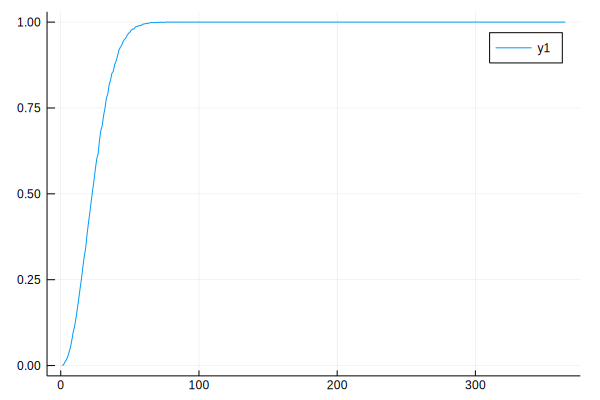

In [41]:
n_alumnos=1:365
grupos = 10000
prob = [repeticiones(grupos,i)/grupos for i in n_alumnos ]
plot(n_alumnos,prob)

In [45]:
prob[80]

1.0

# Cadenas y arreglos

## 3. Modificando arreglos
Escribe una función que acepte como argumento un arreglo y regrese otro arreglo con los elementos del primero pero ordenados al revés.

## 4. Palíndromo
Escribe una función que acepte una cadena y nos diga si es un palíndromo o no.

## 5. Ordenando
Escribe una función que tome un arreglo con números como argumento y regrese `true` si el arreglo está ordenado de menor a mayor y `false` si no lo está.

## 6. Contando letras
1. Escribe una función que lea una cadena y regrese el valor `true` si la palabra no contiene la letra `e`.

In [ ]:
function con_e(cadena)
    for char in cadena
        if char == 'e'
            return false
        end
    end
    return true
end
    

In [50]:
cadena_con = "personas"
cadena_sin = "favor"
con_e(cadena_con)

false

In [51]:
con_e(cadena_sin)

true

2. Modifique la función anterior de tal manera que acepte como argumento una cadena y una letra cualquiera y cuente el número de apariciones de la letra dentro de la cadena.



In [52]:
function con_e(cadena)
    if 'e' ∈ cadena
        return false
    else
        return true
    end    
end

con_e (generic function with 1 method)

In [53]:
function contar_letra(cadena, char)  #### char debe ser tipo char
    contador = 0
    if char ∈ cadena
        for i in 1:length(cadena)
            if cadena[i] == char
                contador += 1
            end
        end
    end
    
    return contador
end
    

contar_letra (generic function with 1 method)

In [54]:
contar_letra("the birthday problem or birthday paradox ",'a') 

4

In [55]:
griegos = "α19aδfua"

"α19aδfua"

In [56]:
contar_letra(griegos,'a')

StringIndexError: StringIndexError("α19aδfua", 2)

In [57]:
function contar_letra_gra(cadena,char)
    index=firstindex(cadena)
    contador = 0
    while index <= lastindex(cadena)
        if cadena[index] == char
            contador += 1
            index = nextind(cadena,index)
        else
            index = nextind(cadena,index)
        end
    end
    return contador
end

contar_letra_gra (generic function with 1 method)

In [58]:
contar_letra_gra(griegos,'a')

2

In [67]:
function contar_karen3(palabra::String,letra::Char)
    cuenta = 0 
    for i in palabra###[1:end]
        if i == letra
            cuenta +=1
        end
    end
    return cuenta
end

contar_karen3 (generic function with 1 method)

In [74]:
methods(+)

# 178 methods for generic function "+":
[1] +(x::Bool, z::Complex{Bool}) in Base at complex.jl:277
[2] +(x::Bool, y::Bool) in Base at bool.jl:104
[3] +(x::Bool) in Base at bool.jl:101
[4] +(x::Bool, y::T) where T<:AbstractFloat in Base at bool.jl:112
[5] +(x::Bool, z::Complex) in Base at complex.jl:284
[6] +(a::Float16, b::Float16) in Base at float.jl:392
[7] +(x::Float32, y::Float32) in Base at float.jl:394
[8] +(x::Float64, y::Float64) in Base at float.jl:395
[9] +(z::Complex{Bool}, x::Bool) in Base at complex.jl:278
[10] +(z::Complex{Bool}, x::Real) in Base at complex.jl:292
[11] +(::Missing, ::Missing) in Base at missing.jl:92
[12] +(::Missing) in Base at missing.jl:79
[13] +(::Missing, ::Number) in Base at missing.jl:93
[14] +(level::Base.CoreLogging.LogLevel, inc::Integer) in Base.CoreLogging at logging.jl:106
[15] +(c::BigInt, x::BigFloat) in Base.MPFR at mpfr.jl:353
[16] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) in Base.GMP at gmp.jl:443
[17] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt) in Base.GMP at gmp.jl:442
[18] +(a::BigInt, b::BigInt, c::BigInt) in Base.GMP at gmp.jl:441
[19] +(x::BigInt, y::BigInt) in Base.GMP at gmp.jl:412
[20] +(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.GMP at gmp.jl:449
[21] +(x::BigInt, c::Union{Int16, Int32, Int64, Int8}) in Base.GMP at gmp.jl:455
[22] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) in Base.MPFR at mpfr.jl:503
[23] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) in Base.MPFR at mpfr.jl:496
[24] +(a::BigFloat, b::BigFloat, c::BigFloat) in Base.MPFR at mpfr.jl:490
[25] +(x::BigFloat, c::BigInt) in Base.MPFR at mpfr.jl:349
[26] +(x::BigFloat, y::BigFloat) in Base.MPFR at mpfr.jl:318
[27] +(x::BigFloat, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.MPFR at mpfr.jl:325
[28] +(x::BigFloat, c::Union{Int16, Int32, Int64, Int8}) in Base.MPFR at mpfr.jl:333
[29] +(x::BigFloat, c::Union{Float16, Float32, Float64}) in Base.MPFR at mpfr.jl:341
[30] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:355
[31] +(x::Dates.CompoundPeriod, y::Dates.Period) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:353
[32] +(x::Dates.CompoundPeriod, y::Dates.TimeType) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:391
[33] +(x::Dates.Date, y::Dates.Day) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:78
[34] +(x::Dates.Date, y::Dates.Week) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:76
[35] +(dt::Dates.Date, z::Dates.Month) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:59
[36] +(dt::Dates.Date, y::Dates.Year) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:32
[37] +(dt::Dates.Date, t::Dates.Time) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:20
[38] +(t::Dates.Time, dt::Dates.Date) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:24
[39] +(x::Dates.Time, y::Dates.TimePeriod) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:82
[40] +(dt::Dates.DateTime, z::Dates.Month) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:52
[41] +(dt::Dates.DateTime, y::Dates.Year) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:28
[42] +(x::Dates.DateTime, y::Dates.Period) in Dates at /home/mvb/Documentos/Programacion/julia/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:80
[43] +(B::BitArray{2}, J::LinearAlgebra.UniformScaling) in LinearAlgebra at /home/

In [66]:
function contar_karen3(palabra,letra)
    cuenta = 0 
    for i in palabra###[1:end]
        if i == letra
            cuenta +=1
        end
    end
    return cuenta
end

contar_karen2 (generic function with 1 method)

In [65]:

contar_karen(12,'a')

0

In [62]:
for i in griegos
    println(i)
end

α
1
9
a
δ
f
u
a
